# Разведочный анализ данных: одномерные методы и сравнение групп


**Разведочный анализ данных** (англ. **exploratory data analysis**, **EDA**) — анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

Понятие введено математиком Джоном Тьюки, который сформулировал цели такого анализа следующим образом:

- максимальное «проникновение» в данные,  
- выявление основных структур,  
- выбор наиболее важных переменных,  
- обнаружение отклонений и аномалий,  
- проверка основных гипотез,  
- разработка начальных моделей.


Основные средства разведочного анализа — изучение вероятностных распределений переменных, построение и анализ корреляционных матриц, факторный анализ, дискриминантный анализ, многомерное шкалирование.

В этом блокноте вы познакомитесь с простыми методами разведочного анализа для изучения отдельных переменных и сравнения групп.


## Ресурсы

* Книги Уэса Маккинни Python и анализ данных и Дж. Вандер Пласа Python для сложных задач (см. ресурсы в LMS)
* Визуализация в Pandas https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* Документация Seaborn http://seaborn.pydata.org/tutorial.html
* Галерея графиков Matplotlib https://matplotlib.org/gallery/index.html
* Python Plotting for Exploratory Analysis https://pythonplot.com/
* A Dramatic Tour through Python’s Data Visualization Landscape (including ggplot and Altair) [ссылка](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)

Классные ресурсы по выбору способов визуализаций + примеры:
* https://www.data-to-viz.com/  
* https://datavizproject.com/  
* https://datavizcatalogue.com/RU/
* https://datayoga.ru/vizcards#catalogue

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Пакет для построения статистических графиков и разведочного анализа
%matplotlib inline

mpg = pd.read_csv('../datasets/mpg.csv')
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Мы загрузили данные о расходе топлива автомобилями разных марок и годов производства. Столбцы таблицы обозначают:

 - `manufacturer` - марка машины
 - `model` - модель
 - `displ` - объем двигателя в л
 - `year` - год выпуска
 - `cyl` - количество цилиндров
 - `trans` - тип трансмиссии (ручная или автоматическая коробка передач)
 - `drv` - тип привода (`f` - передний, `r` - задний, `4` - полный)
 - `cty` - пробег на 1 галлоне топлива (~4 л) в городе
 - `cty` - пробег на 1 галлоне топлива на трассе
 - `fl` - тип топлива
 - `class` - класс машины
 
Загруженный набор данных доступен в виде объекта `mpg`. Тип объекта - `DataFrame` (датафрейм, или просто таблица данных).

## Описательные статистики

### Для количественных данных
[Описательные статистики](http://statistica.ru/glossary/general/opisatelnye-statistiki/) помогают с помощью короткой числовой сводки охарактеризовать форму распределения количественных данных.

Наиболее распространенные:

- **количество наблюдений** (count), позволяющее оценить объем выборки данных;
- **характеристики центра** распределения - **среднее** (mean) и **медиана** (median);  
- **характеристики разброса** значений - **минимум**, **максимум**, **стандартное отклонение** (standard deviation, std);
- **характеристики формы** распределения - **ассиметрия** (skew) и **эксцесс** (kurtosis), а также **квартили** (quartiles)


На рисунке показаны три распределения с одинаковым центром, но разным **стандартным отклонением**: $\sigma_1 < \sigma_2 <\sigma_3$

![](pics/stdev.png)


На рисунке показаны три распределения с разной **асимметрией**:

![](pics/descriptives.png)

Нулевая асимметрия (слева на рисунке) означает, что распределение симметрично относительно центра. Положительная асимметрия (в центре рисунка) говорит о том, что у распределения есть длинный правый хвост - редкие большие значения. В этом случае также говорят, что распределение скошено вправо. Отрицательная асимметрия говорит о том, что хвост распределения уходит в область малых и отрицательных значений, - распределение скошено влево.

**Эксцесс** характеризует степень плосковершинности распределения. Нулевой эксцесс у нормального распределение, а увеличение эксцесса означает большую сконцентрированность значений вблизи центра, более высокий пик распределения:

![](pics/kurtosis.png)

**Квартили** (25% - нижний, 50% - медиана, 75% - верхний) - это значения, которые разбивают ранжированный по возрастанию значений ряд на 4 равные по количеству наблюдений части. Медиана используется как характеристика положения центра распределения, а верхний и нижний квартили позволяют понять, в каком диапазоне сконцентрирована половина наблюдаемых значений.

Фраза: *"3-й квартиль продолжительности жизни в стране равен 70 годам"* означает, что 75% людей не доживает до этого возраста, а 25% людей живут 70 лет и дольше.


![](pics/quartiles.png)



Таблицы `pandas` содержат метод `describe()`, вычисляющий описательные статистики для количественных переменных:

В `pandas` можно быстро получить сводку по всем числовым столбцам в таблице данных с помощью метода `describe()`

In [2]:
mpg.describe().round(1)

,displ,year,cyl,cty,hwy
count,234.0,234.0,234.0,234.0,234.0
mean,3.5,2003.5,5.9,16.9,23.4
std,1.3,4.5,1.6,4.3,6.0
min,1.6,1999.0,4.0,9.0,12.0
25%,2.4,1999.0,4.0,14.0,18.0
50%,3.3,2003.5,6.0,17.0,24.0
75%,4.6,2008.0,8.0,19.0,27.0
max,7.0,2008.0,8.0,35.0,44.0


Здесь мы видим, например, что распределение объемов двигателей `displ` немного асимметрично, среднее смещено вправо относительно медианы (50% квартиля), а в случае с `hwy` среднее, наоборот, немного смещено влево по отношению к медиане.

Квартили показывают, что центральные 50% значений переменной `displ` находятся в интервале от 2.4 до 4.6 литров, а наибольший и наименьший объемы двигателей - 7 и 1.6 литров соответственно (max и min).

Квартили показывают, что центральные 50% значений переменной `hwy` находятся в интервале от 18 до 27 миль/галлон, а наибольший и пробег - 44 и 12 миль соответственно (max и min).

В сводке нет информации об асимметрии, но мы можем ее вычислить с помощью метода `skew()`:

In [3]:
mpg[['displ', 'hwy']].skew()

displ    0.444316
hwy      0.369236
dtype: float64

Оба столбца имеют небольшую положительную асимметрию, т.е. правый хвост.

Анализируя описательные статистики, можно примерно представить себе форму распределения данных. Но лучше посмотреть на нее воочию, визуализировав данные. Библиотека `pandas` умеет строить быстрые визуализации данных в таблице. Посмотрим как выглядит распределение данных с помощью гистограммы.

Данные по объему двигателей:

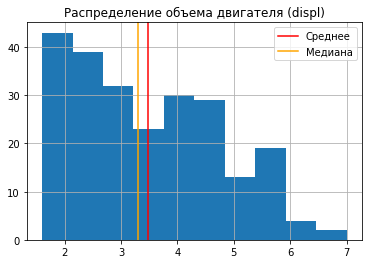

In [4]:
ax = mpg['displ'].hist()
ax.axvline(mpg['displ'].mean(), color = 'red', label='Среднее')
ax.axvline(mpg['displ'].median(), color = 'orange', label='Медиана')
ax.legend();
ax.set_title('Распределение объема двигателя (displ)');

Данные по пробегу на галлоне на трассе:

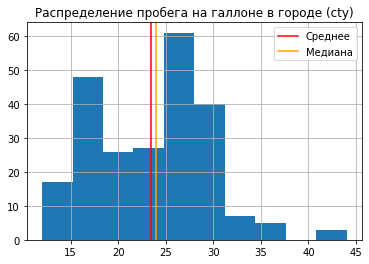

In [5]:
ax = mpg['hwy'].hist()
ax.axvline(mpg['hwy'].mean(), color = 'red', label='Среднее')
ax.axvline(mpg['hwy'].median(), color = 'orange', label='Медиана')
ax.legend();
ax.set_title('Распределение пробега на галлоне в городе (cty)');

С распределением `displ` мы угадали на основе описательных статистик, а вот с распределением `cty` ситуация неоднозначная. Распределение не такое скошенное, но видно, что есть выбросы. Визуализация помогает окончательно разобраться, что происходит в данных.

В `pandas` есть следующие мтеоды для вычисления описательных статистик:
![pics](pics/pandas-descriptives.png)

Методы можно применять как к столбцам, так и к строкам. По умолчанию методы пропускают неизвестные значения `na`. При необходимости, можно отключить это поведение аргументом `skipna=False`.

In [6]:
mpg.mean() # Среднее всех количественных переменных

displ       3.471795
year     2003.500000
cyl         5.888889
cty        16.858974
hwy        23.440171
dtype: float64

In [7]:
mpg.skew() # Асимметрия всех количественных переменных

displ    0.444316
year     0.000000
cyl      0.113800
cty      0.796561
hwy      0.369236
dtype: float64

In [8]:
mpg['cty'].median() # Медиана столбца cty

17.0

### Для категориальных данных

Для категориальных данных рассмотренные выше описательные статистики не применяются, т.к. их значения - это не числа. Чаще всего это текстовые значения - например, названия продуктов или категорий. Для таких данных применяется подсчет частот отдельных значений. Мы можем оценить, насколько часто встречаются те или иные категории в данных. Самое частое значение называется **модой**.

In [9]:
mpg['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

Эти результаты можно нарисовать с помощью столбиковой диаграммы:

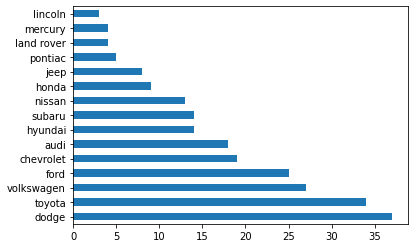

In [10]:
mpg['manufacturer'].value_counts().plot(kind='barh');

Чтобы интерпретация результатов не зависела от количества наблюдений в таблице данных, лучше использовать **относительные частоты** (доля от общего числа наблюдений:

In [11]:
mpg['manufacturer'].value_counts(normalize=True)

dodge         0.158120
toyota        0.145299
volkswagen    0.115385
ford          0.106838
chevrolet     0.081197
audi          0.076923
hyundai       0.059829
subaru        0.059829
nissan        0.055556
honda         0.038462
jeep          0.034188
pontiac       0.021368
land rover    0.017094
mercury       0.017094
lincoln       0.012821
Name: manufacturer, dtype: float64

Для визуализации упорядочим категории по убыванию, чтобы самые частые значения были вверху на графике:

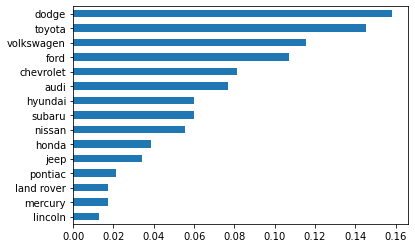

In [12]:
mpg['manufacturer'].value_counts(normalize=True, ascending=True ).plot(kind='barh');

## Визуализация распределений

Рассмотрим несколько способов визуализации распределений

### Гистограммы

**Гистограмма** показывает частоту попадания значений в заданные интервалы на числовой оси. Важно, что в гистограмме эти интервалы идут подряд, потому что этот вид графика применяется для непрерывных данных. Гистограмму часто путают со столбиковой диаграммой, которая используется для отображения частот дискретных значений.

Мы уже строили гистограммы при помощи pandas:

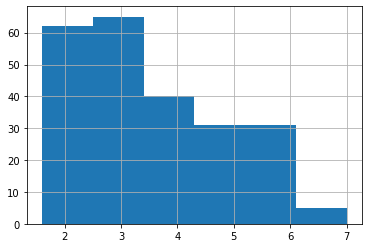

In [13]:
mpg['displ'].hist(bins=6);

Так можно построить гистограмму по таблице данных средствами matplotlib:

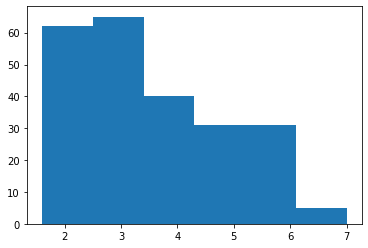

In [14]:
plt.hist('displ', data=mpg, bins=6);

Гистограммы можно строить и с помощью пакета seaborn:

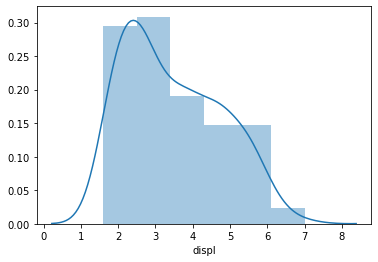

In [15]:
sns.distplot(mpg['displ'], bins=6);

Seaborn помимо столбиков выводит еще сглаженную кривую для оценки плотности распределения (**kernel density estimate, kde**). При необходимости ее можн отключить:

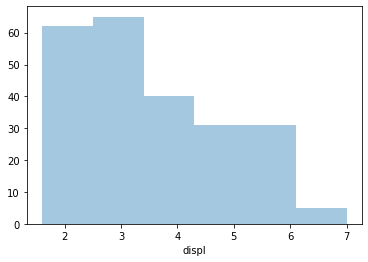

In [16]:
sns.distplot(mpg['displ'], bins=6, kde=False);

Или, наоборот, оставить только плотность, что удобно для сравнения распределений:

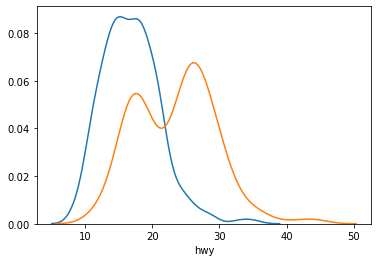

In [17]:
sns.distplot(mpg['cty'], bins=6, hist=False)
sns.distplot(mpg['hwy'], bins=6, hist=False);

### Ящичные диаграммы

**Ящичная диаграмма** (ящик с усами, box plot, box and whisker plot) позволяет компактно передать основные характеристики распределения данных - медиану, область наиболее типичных значений, наличие выбросов в данных.

![](pics/boxplot.png)


Ящичная диаграмма средствами matplotlib:

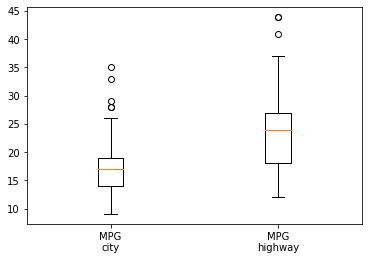

In [18]:
plt.boxplot([mpg['cty'], mpg['hwy']], labels=['MPG\ncity', 'MPG\nhighway']);

Ящичная диаграмма через pandas:

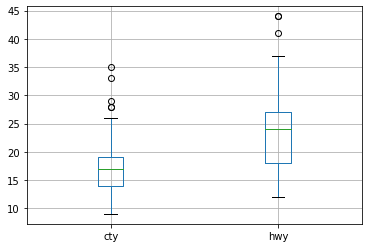

In [19]:
mpg.boxplot(column=['cty', 'hwy']);

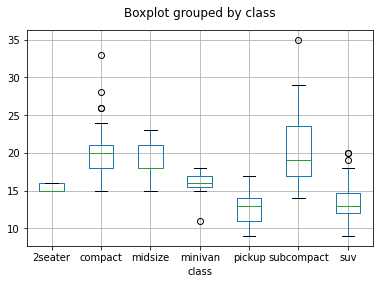

In [20]:
mpg.boxplot(column='cty', by='class')
plt.title('');

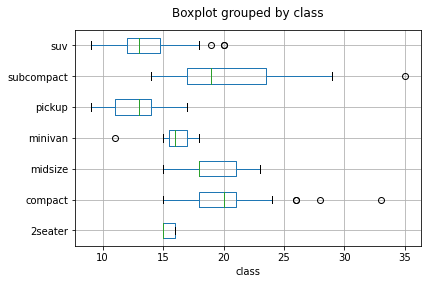

In [21]:
mpg.boxplot(column='cty', by='class', vert=False)
plt.title('');

В Seaborn:

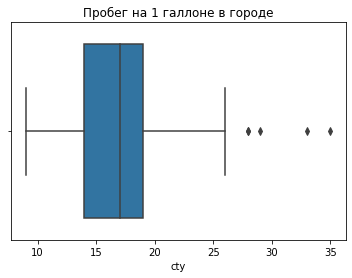

In [22]:
sns.boxplot('cty', data=mpg)
plt.title('Пробег на 1 галлоне в городе');

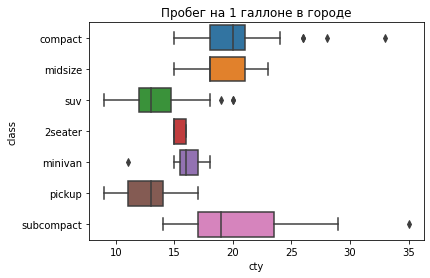

In [23]:
sns.boxplot(y = 'class', x='cty', data=mpg)
plt.title('Пробег на 1 галлоне в городе');

Ящичные диаграммы скрывают данные, поэтому в seaborn можно добавить на эту диаграмму сами данные:

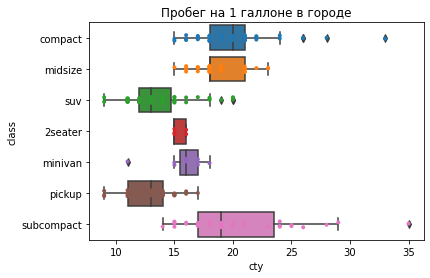

In [24]:
sns.boxplot(y = 'class', x='cty', data=mpg)
sns.stripplot(y = 'class', x='cty', data=mpg, size=4)
plt.title('Пробег на 1 галлоне в городе');

Точки данных можно нанести и на гистограмму:

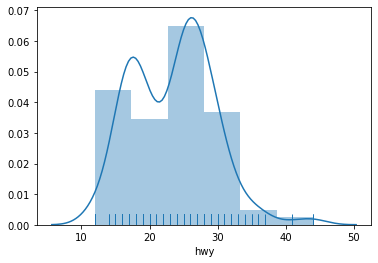

In [25]:
sns.distplot(mpg['hwy'], bins=6, rug=True);

Еще одна вариация на тему отображения данных - violin plot, гибрид ящичной диаграммы и плотности распределения:

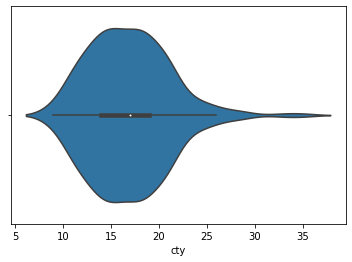

In [26]:
sns.violinplot('cty', data=mpg);

## Столбиковые диаграммы

Столбиковые диаграммы используются для отображения групповых частот для категориальных данных.

Столбики с частотами в pandas:

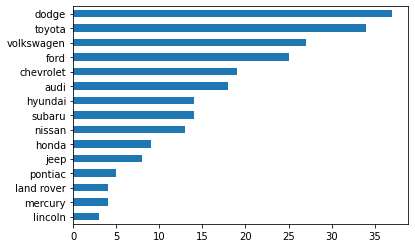

In [27]:
mpg['manufacturer'].value_counts(ascending=True).plot(kind='barh');

Еще один способ получить столбики с частотами - использовать `groubpy()`:

In [28]:
mpg_manuf_grouped=mpg.groupby('manufacturer').count()['model']
mpg_manuf_grouped

manufacturer
audi          18
chevrolet     19
dodge         37
ford          25
honda          9
hyundai       14
jeep           8
land rover     4
lincoln        3
mercury        4
nissan        13
pontiac        5
subaru        14
toyota        34
volkswagen    27
Name: model, dtype: int64

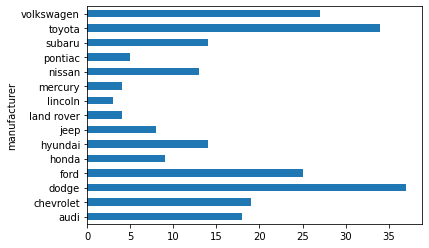

In [29]:
mpg_manuf_grouped.plot(kind='barh');

Лучше упорядочить категории по частоте:

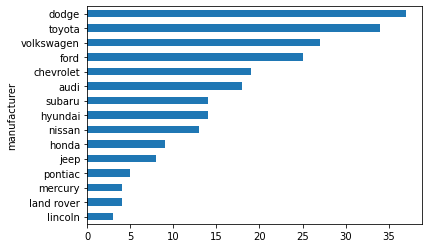

In [30]:
mpg_manuf_grouped.sort_values().plot(kind='barh');

В Matplotlib сначала придется посчитать частоты, а затем уже их визуализировать:

In [36]:
mpg_manuf_counts = mpg.groupby('manufacturer', as_index=False).count().sort_values('model')
mpg_manuf_counts

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
8,lincoln,3,3,3,3,3,3,3,3,3,3
7,land rover,4,4,4,4,4,4,4,4,4,4
9,mercury,4,4,4,4,4,4,4,4,4,4
11,pontiac,5,5,5,5,5,5,5,5,5,5
6,jeep,8,8,8,8,8,8,8,8,8,8
4,honda,9,9,9,9,9,9,9,9,9,9
10,nissan,13,13,13,13,13,13,13,13,13,13
5,hyundai,14,14,14,14,14,14,14,14,14,14
12,subaru,14,14,14,14,14,14,14,14,14,14
0,audi,18,18,18,18,18,18,18,18,18,18


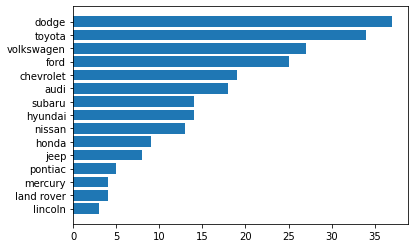

In [37]:
plt.barh(y='manufacturer', width='model', data=mpg_manuf_counts);

В seaborn функция для построения диаграммы автоматически подсчитывает частоты:

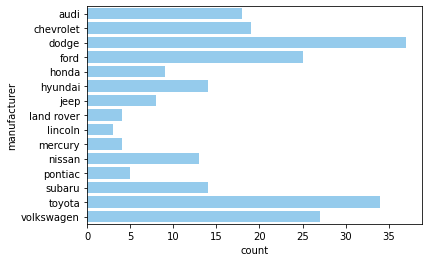

In [33]:
sns.countplot(data=mpg, y='manufacturer',
              color='lightskyblue');

Однако, если мы хотим построить рейтинг, то статистику для сортировки столбцов все же придется посчитать:

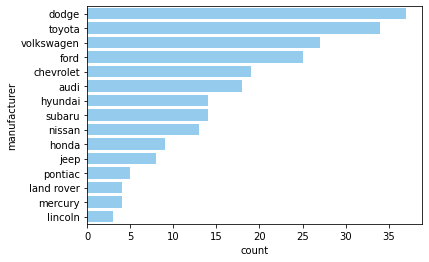

In [34]:
sns.countplot(data=mpg, y='manufacturer',
              color='lightskyblue',
              order=mpg['manufacturer'].value_counts().index);